In [59]:
# =============================================================================
# ADIM 3: TOKENİZASYON, LEMMATİZASYON, STEMMING VE SINIFLANDIRMA
# =============================================================================

import pandas as pd
import numpy as np
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# NLTK verilerini indir
nltk.download('punkt')
nltk.download('stopwords')

# spaCy modelini yükle
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Veri setini yükle
df_clean = pd.read_csv('../data/cleaned_imdb_dataset.csv')
print(f"✅ Temizlenmiş veri seti yüklendi: {df_clean.shape}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ekol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ekol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Temizlenmiş veri seti yüklendi: (50000, 2)


In [60]:
# =============================================================================
# 1. TOKENİZASYON
# =============================================================================

def tokenize_text(text):
    """Metni kelimelere ayır (tokenize et)"""
    return word_tokenize(text)

df_clean['tokens'] = df_clean['review'].apply(tokenize_text)

# Örnek göster
print("\n🔍 Tokenizasyon Örneği:")
print(f"Orijinal: {df_clean['review'].iloc[0][:150]}...")
print(f"Tokenlar: {df_clean['tokens'].iloc[0][:10]}...")


🔍 Tokenizasyon Örneği:
Orijinal: one of the other reviewers has mentioned that after watching just oz episode you ll be hooked they are right as this is exactly what happened with me ...
Tokenlar: ['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching']...


In [61]:
# =============================================================================
# 2. DURDURMA KELİMELERİNİ FİLTRELEME
# =============================================================================

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    """Durdurma kelimelerini kaldır"""
    return [token for token in tokens if token.lower() not in stop_words]

df_clean['tokens_no_stop'] = df_clean['tokens'].apply(remove_stopwords)

# Örnek göster
print("\n🔍 Durdurma Kelimeleri Filtreleme Örneği:")
print(f"Önce: {df_clean['tokens'].iloc[0][:10]}...")
print(f"Sonra: {df_clean['tokens_no_stop'].iloc[0][:10]}...")



🔍 Durdurma Kelimeleri Filtreleme Örneği:
Önce: ['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching']...
Sonra: ['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened']...


In [62]:
# =============================================================================
# 3. LEMMATİZASYON
# =============================================================================

def lemmatize_text(tokens):
    """Kelimeleri lemmatize et"""
    doc = nlp(' '.join(tokens))
    return [token.lemma_ for token in doc]

df_clean['tokens_lemmatized'] = df_clean['tokens_no_stop'].apply(lemmatize_text)

# Örnek göster
print("\n🔍 Lemmatizasyon Örneği:")
print(f"Önce: {df_clean['tokens_no_stop'].iloc[0][:10]}...")
print(f"Sonra: {df_clean['tokens_lemmatized'].iloc[0][:10]}...")



🔍 Lemmatizasyon Örneği:
Önce: ['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened']...
Sonra: ['one', 'reviewer', 'mention', 'watch', 'oz', 'episode', 'hook', 'right', 'exactly', 'happen']...


In [63]:
# =============================================================================
# 4. STEMMING
# =============================================================================

stemmer = PorterStemmer()

def stem_text(tokens):
    """Kelimeleri stem et"""
    return [stemmer.stem(token) for token in tokens]

df_clean['tokens_stemmed'] = df_clean['tokens_no_stop'].apply(stem_text)

# Örnek göster
print("\n🔍 Stemming Örneği:")
print(f"Önce: {df_clean['tokens_no_stop'].iloc[0][:10]}...")
print(f"Sonra: {df_clean['tokens_stemmed'].iloc[0][:10]}...")



🔍 Stemming Örneği:
Önce: ['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened']...
Sonra: ['one', 'review', 'mention', 'watch', 'oz', 'episod', 'hook', 'right', 'exactli', 'happen']...


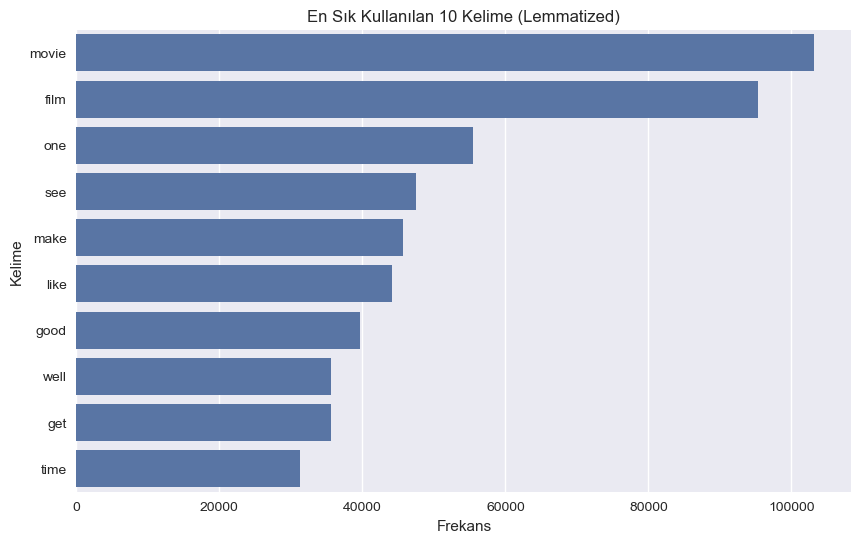

In [64]:
from collections import Counter

all_tokens = [token for tokens in df_clean['tokens_lemmatized'] for token in tokens]
word_freq = Counter(all_tokens).most_common(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=[count for word, count in word_freq], y=[word for word, count in word_freq])
plt.title('En Sık Kullanılan 10 Kelime (Lemmatized)')
plt.xlabel('Frekans')
plt.ylabel('Kelime')
plt.show()

In [65]:
# ## 6. İşlenmiş Veriyi Kaydet
# İşlenmiş veriyi bir CSV dosyasına kaydediyoruz.

# %% [code]
df_clean.to_csv('../data/processed_imdb_dataset.csv', index=False)
print("✅ İşlenmiş veri '../data/processed_imdb_dataset.csv' dosyasına kaydedildi.")

✅ İşlenmiş veri '../data/processed_imdb_dataset.csv' dosyasına kaydedildi.
